# TOPMODEL testing: attempting to create more moist areas within Lompolonjängänoja catchment

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iotools import read_AsciiGrid
eps = np.finfo(float).eps  # machine epsilon

file1 = r'F:\SpaFHy_2D_2021/testcase_input_202304111218.nc' # twi_cutoff = 99.5
file2 = r'F:\SpaFHy_2D_2021/testcase_input_202304111220.nc' # twi_cutoff = 97.5
file3 = r'F:\SpaFHy_2D_2021/testcase_input_202304111223.nc' # twi_cutoff = 95.5
file4 = r'F:\SpaFHy_2D_2021/testcase_input_202304111225.nc' # twi_cutoff = 90.5
file5 = r'F:\SpaFHy_2D_2021/testcase_input_202304111320.nc' # saga twi_cutoff = 99.5
file6 = r'F:\SpaFHy_2D_2021/testcase_input_202304111318.nc' # saga twi_cutoff = 97.5
file7 = r'F:\SpaFHy_2D_2021/testcase_input_202304111315.nc' # saga twi_cutoff = 95.5
file8 = r'F:\SpaFHy_2D_2021/testcase_input_202304111227.nc' # saga twi_cutoff = 90.5

In [2]:
twi1 = xr.open_dataset(file1)
twi2 = xr.open_dataset(file2)
twi3 = xr.open_dataset(file3)
twi4 = xr.open_dataset(file4)
swi1 = xr.open_dataset(file5)
swi2 = xr.open_dataset(file6)
swi3 = xr.open_dataset(file7)
swi4 = xr.open_dataset(file8)

### Raw TWI and SAGA TWI

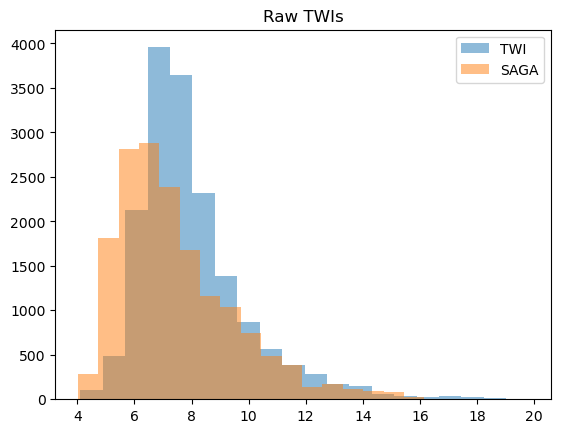

In [4]:
from utils import twi

fn_flow = r'C:\SpaFHy_v1_Pallas_2D/testcase_input/parameters/flowacc_p.dat'
fn_slope = r'C:\SpaFHy_v1_Pallas_2D/testcase_input/parameters/slope_old.dat'
flowacc = read_AsciiGrid(fn_flow)[0]
slope = read_AsciiGrid(fn_slope)[0]

twigrid = twi(flowacc=flowacc, dx=16, slope_rad=np.radians(slope), twi_method='standard')
swigrid = twi(flowacc=flowacc, dx=16, slope_rad=np.radians(slope), twi_method='saga')

cutoff = [99.5, 95, 90]

n, bins, patches = plt.hist((twigrid).flatten(), bins=20, alpha=0.5, label='TWI')
n, bins, patches = plt.hist((swigrid).flatten(), bins=20, alpha=0.5, label='SAGA')
#for i in cutoff:
#    temp_clim = np.percentile(twigrid[twigrid > 0], i)
#    temp_clim2 = np.percentile(swigrid[swigrid > 0], i)
#    plt.axvline(temp_clim, color='tab:blue')
#    plt.axvline(temp_clim2, color='tab:orange')

plt.title(f'Raw TWIs')
plt.legend()

### TWI and SAGA with different cutoff values

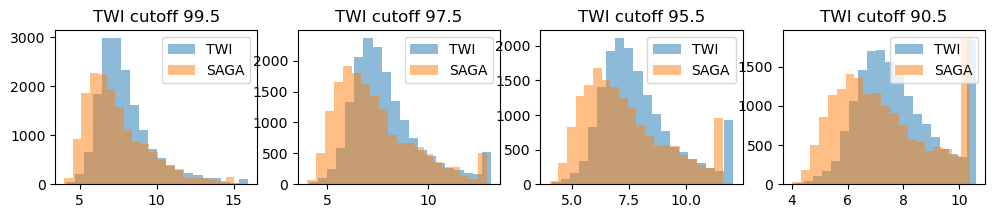

In [43]:
cutoffs = [99.5, 97.5, 95.5, 90.5]

# for twi
twi_clim = np.percentile(twigrid[twigrid > 0], cutoff)
# cuts the tail but assigns the exceeding values to the 'twi_cutoff' quantile
twitemp = twigrid.copy()
twitemp[twigrid > twi_clim] = twi_clim
# for swi
swi_clim = np.percentile(swigrid[swigrid > 0], cutoff)
switemp = swigrid.copy()
switemp[swigrid > swi_clim] = swi_clim

plt.figure(figsize=(12,2))

for i in range(len(cutoffs)):
    cutoff = cutoffs[i]
    twi_clim = np.percentile(twigrid[twigrid > 0], cutoff)
    # cuts the tail but assigns the exceeding values to the 'twi_cutoff' quantile
    twitemp = twigrid.copy()
    twitemp[twigrid > twi_clim] = twi_clim
    # for swi
    swi_clim = np.percentile(swigrid[swigrid > 0], cutoff)
    switemp = swigrid.copy()
    switemp[swigrid > swi_clim] = swi_clim
    plt.subplot(1,4,i+1)
    n, bins, patches = plt.hist((twitemp).flatten(), bins=20, alpha=0.5, label='TWI')
    n, bins, patches = plt.hist((switemp).flatten(), bins=20, alpha=0.5, label='SAGA')
    plt.title(f'TWI cutoff {cutoff}')
    plt.legend()

### Local mean saturation deficit

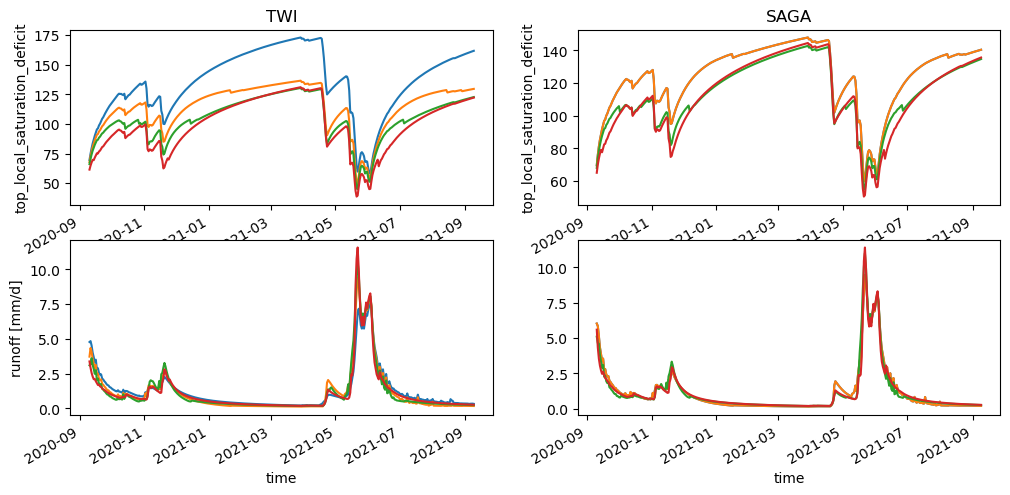

In [55]:
plt.figure(figsize=(12,5))
ax = plt.subplot(2,2,1)
#results['soil_ground_water_level'][-1,:,:].plot(cmap='coolwarm_r', vmin=-4, vmax=4)
twi1['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
twi2['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
twi3['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
twi4['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
plt.title('TWI')
plt.subplot(2,2,2)
swi1['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi2['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi3['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
swi4['top_local_saturation_deficit'].mean(dim=['lat', 'lon']).plot()
plt.title('SAGA')
plt.subplot(2,2,3)
#results['soil_ground_water_level'][-1,:,:].plot(cmap='coolwarm_r', vmin=-4, vmax=4)
(twi1['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi1['top_baseflow']).plot()
(twi2['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi2['top_baseflow']).plot()
(twi3['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi3['top_baseflow']).plot()
(twi4['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + twi4['top_baseflow']).plot()
plt.ylabel('runoff [mm/d]')
plt.subplot(2,2,4)
(swi1['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi1['top_baseflow']).plot()
(swi2['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi2['top_baseflow']).plot()
(swi3['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi3['top_baseflow']).plot()
(swi4['bucket_surface_runoff'].mean(dim=['lat', 'lon']) + swi4['top_baseflow']).plot()


### Plotting results with different TWI cutoff parameter

Text(0.5, 1.0, 'SAGA cutoff = 90.5')

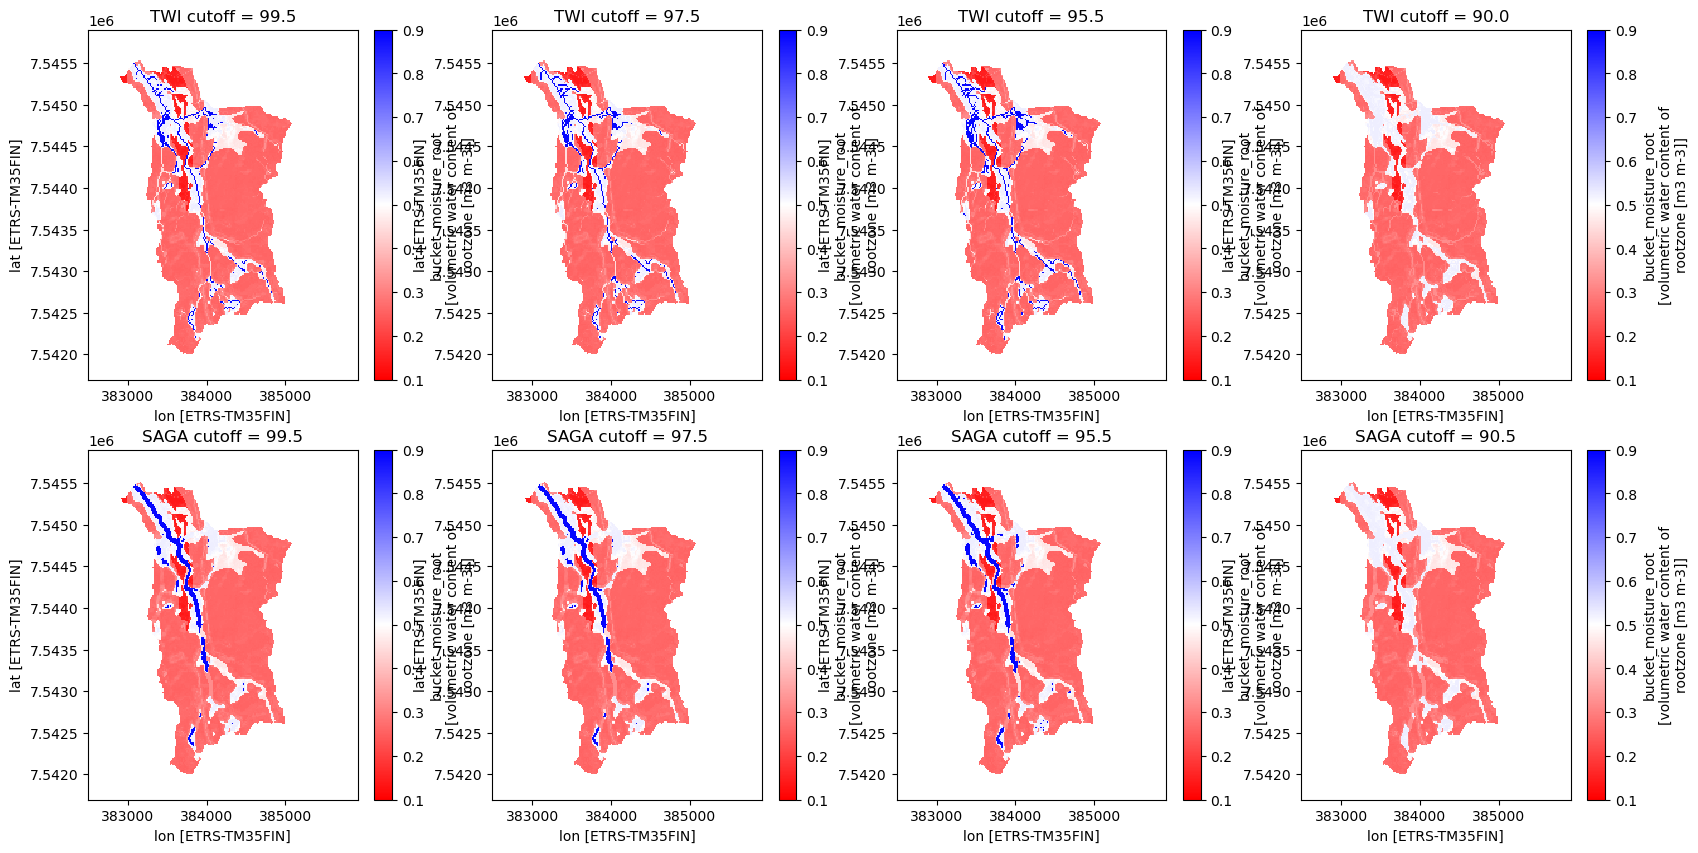

In [33]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2,4,1)
#results['soil_ground_water_level'][-1,:,:].plot(cmap='coolwarm_r', vmin=-4, vmax=4)
twi1['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('TWI cutoff = 99.5')
plt.subplot(2,4,2, sharex=ax, sharey=ax)
twi2['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('TWI cutoff = 97.5')
plt.subplot(2,4,3, sharex=ax, sharey=ax)
twi3['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('TWI cutoff = 95.5')
plt.subplot(2,4,4, sharex=ax, sharey=ax)
twi4['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('TWI cutoff = 90.0')
plt.subplot(2,4,5, sharex=ax, sharey=ax)
swi1['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('SAGA cutoff = 99.5')
plt.subplot(2,4,6, sharex=ax, sharey=ax)
swi2['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('SAGA cutoff = 97.5')
plt.subplot(2,4,7, sharex=ax, sharey=ax)
swi3['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('SAGA cutoff = 95.5')
plt.subplot(2,4,8, sharex=ax, sharey=ax)
swi4['bucket_moisture_root'].sel(time='2021-06-17').plot(cmap='bwr_r', vmin=0.1, vmax=0.9)
plt.title('SAGA cutoff = 90.5')

Text(0.5, 1.0, '(TWI cutoff = 95.5) - (SWI cutoff = 95.5)')

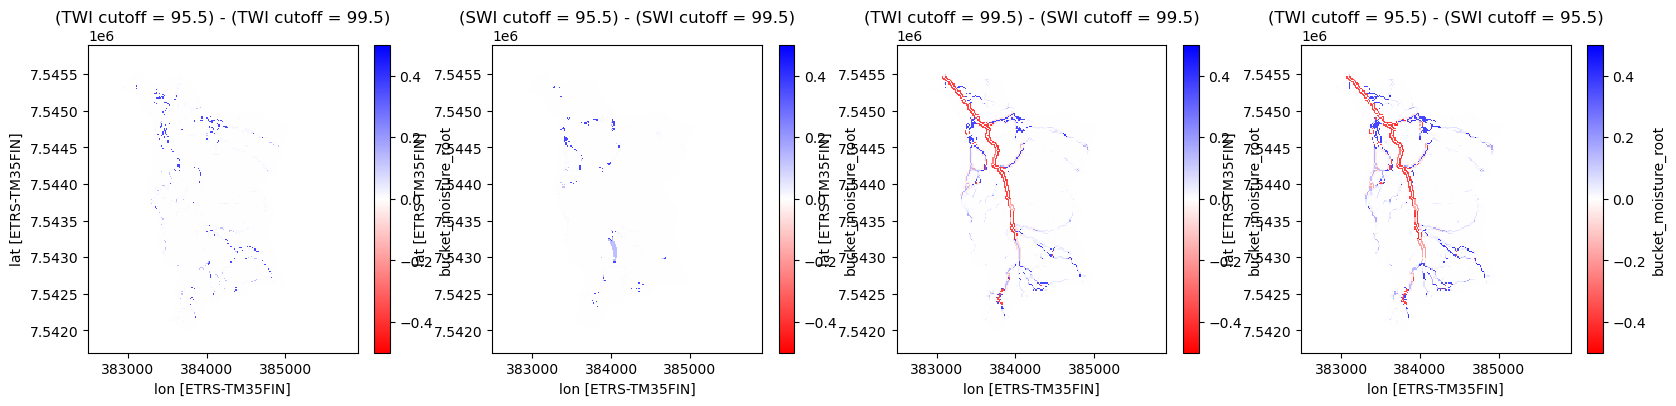

In [41]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
(twi3['bucket_moisture_root'].sel(time='2021-06-17')-twi1['bucket_moisture_root'].sel(time='2021-06-17')).plot(cmap='bwr_r', vmin=-0.5, vmax=0.5)
plt.title('(TWI cutoff = 95.5) - (TWI cutoff = 99.5)')
plt.subplot(1,4,2)
(swi3['bucket_moisture_root'].sel(time='2021-06-17')-swi1['bucket_moisture_root'].sel(time='2021-06-17')).plot(cmap='bwr_r', vmin=-0.5, vmax=0.5)
plt.title('(SWI cutoff = 95.5) - (SWI cutoff = 99.5)')
plt.subplot(1,4,3)
(twi1['bucket_moisture_root'].sel(time='2021-06-17')-swi1['bucket_moisture_root'].sel(time='2021-06-17')).plot(cmap='bwr_r', vmin=-0.5, vmax=0.5)
plt.title('(TWI cutoff = 99.5) - (SWI cutoff = 99.5)')
plt.subplot(1,4,4)
(twi3['bucket_moisture_root'].sel(time='2021-06-17')-swi3['bucket_moisture_root'].sel(time='2021-06-17')).plot(cmap='bwr_r', vmin=-0.5, vmax=0.5)
plt.title('(TWI cutoff = 95.5) - (SWI cutoff = 95.5)')